In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:

df = pd.read_csv('C:/Users/cqyzxy/Downloads/13147324/qmof_database/qmof_database/qmof_database/qmof.csv', sep=',')
df


C:\Users\cqyzxy\AppData\Local\Temp\ipykernel_18984\1608291622.py:1: DtypeWarning: Columns (40,41,43,44,45,46,47,49,50,51,52,53,55,56,57,65,66,67,68,69,77,78,79,80,81,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/cqyzxy/Downloads/13147324/qmof_database/qmof_database/qmof_database/qmof.csv', sep=',')


,qmof_id,name,info.formula,info.formula_reduced,info.mofid.mofid,info.mofid.mofkey,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.mofid.topology,...,outputs.hse06.energy_elec,outputs.hse06.net_magmom,outputs.hse06.bandgap,outputs.hse06.cbm,outputs.hse06.vbm,outputs.hse06.directgap,outputs.hse06.bandgap_spins,outputs.hse06.cbm_spins,outputs.hse06.vbm_spins,outputs.hse06.directgap_spins
0,qmof-8a95c27,ABACUF01_FSR,Ba2CuC6H14O16,Ba2CuC6H14O16,NaN,NaN,"['O', '[Ba]', '[Cu]']",['[O-]C=O'],O.[Ba].[Cu].[O-]C=O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,qmof-019ba28,ABALOF_FSR,Cu12C36H56I16N4S4,Cu3C9H14I4NS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,qmof-830ed1c,ABAVIJ_FSR,Co4C48H32N8O16,CoC12H8N2O4,[Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0,Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl,['[Co]'],['[O-]C(=O)c1ccncc1'],[Co].[O-]C(=O)c1ccncc1,rtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,qmof-5bd4a24,ABAVOP_FSR,Co4C48H32N8O16,CoC12H8N2O4,[Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0,Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl,['[Co]'],['[O-]C(=O)c1ccncc1'],[Co].[O-]C(=O)c1ccncc1,rtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,qmof-644aab4,ABAXUZ_FSR,Zn2C50H32N6O8S4,ZnC25H16N3O4S2,NaN,NaN,['[Zn][Zn]'],"['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...",[O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...,NaN,...,-811.553859,0.0,2.901747,2.246703,-0.655044,True,"[None, None]","[None, None]","[None, None]","[None, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-7aebbbb,tobacco_srsb_sym_3_on_2_sym_3_mc_0_L_2,Cu12C84H60N24,CuC7H5N2,N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=CC...,Cu.IBPUNEAULYEGJU.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=...,N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=CC...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20370,qmof-9a04c15,tobacco_srsb_sym_3_on_2_sym_3_mc_0_L_6,Cu12C84H48N60,CuC7H4N5,N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1=C...,Cu.JWLDCPHWRGZUAB.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1...,N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1=C...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20371,qmof-0dce90f,tobacco_srsb_sym_3_on_2_sym_3_mc_0__,Cu12C60H36N24,CuC5H3N2,N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]N=...,Cu.PJSMFZDMZONQKK.MOFkey-v1.srs,"['[Cu]', '[Cu][Cu]']",['N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]...,N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]N=...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20372,qmof-955fe88,tobacco_srsb_sym_3_on_4_sym_3_mc_0_L_2,Cu12C112H72N24,Cu3C28H18N6,N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C]2...,Cu.WCJPEIPZJUESBA.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C...,N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C]2...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_remove = [
    'name', 'info.formula', 'info.formula_reduced',
       'info.mofid.mofid', 'info.mofid.mofkey', 'info.mofid.topology', 'info.symmetry.spacegroup',
       'info.symmetry.spacegroup_number', 'info.symmetry.spacegroup_crystal',
        'info.symmetry.pointgroup',
        'info.synthesized', 'info.source', 'info.doi',
       'inputs.pbe.theory',
       'inputs.pbe.pseudopotentials', 'inputs.pbe.encut', 'inputs.pbe.kpoints',
       'inputs.pbe.gamma', 'inputs.hse06.theory',
       'inputs.hse06.pseudopotentials', 'inputs.hse06.encut', 'inputs.hse06.kpoints',
       'inputs.hse06.gamma', 'inputs.hle17.theory',
       'inputs.hle17.pseudopotentials', 'inputs.hle17.encut', 'inputs.hle17.kpoints',
       'inputs.hle17.gamma', 'inputs.hse06_10hf.theory',
       'inputs.hse06_10hf.pseudopotentials', 'inputs.hse06_10hf.encut', 'inputs.hse06_10hf.kpoints',
       'inputs.hse06_10hf.gamma'
] # Please update based on the columns you want to remove

df.drop(columns_to_remove, axis=1, inplace=True)
print(len(df.columns), 'columns remaining')

61 columns remaining


# Take out bandgap_pbe

In [13]:

bandgap_pbe = df['outputs.pbe.bandgap']
bandgap_pbe

0        0.632527
1        1.134232
2        0.345448
3        0.342645
4        1.973007
           ...   
20369    2.692705
20370    3.326284
20371    3.383629
20372    0.660589
20373    2.348021
Name: outputs.pbe.bandgap, Length: 20374, dtype: float64

In [17]:
df_numerical = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(include=['object', 'category'])
df_numerical


,info.natoms,info.pld,info.lcd,info.density,info.volume,outputs.pbe.energy_total,outputs.pbe.energy_vdw,outputs.pbe.energy_elec,outputs.pbe.net_magmom,outputs.pbe.bandgap,...,outputs.hse06_10hf.bandgap,outputs.hse06_10hf.cbm,outputs.hse06_10hf.vbm,outputs.hse06.energy_total,outputs.hse06.energy_vdw,outputs.hse06.energy_elec,outputs.hse06.net_magmom,outputs.hse06.bandgap,outputs.hse06.cbm,outputs.hse06.vbm
0,39,0.68822,1.35480,2.763246,408.857471,-238.661417,-3.38941,-235.272007,1.0,0.632527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128,1.18570,2.13507,3.229952,1781.965032,-672.046744,-15.98125,-656.065494,0.0,1.134232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,108,2.36128,4.21176,1.557644,1292.643180,-759.996078,-8.60846,-751.387618,12.0,0.345448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108,2.14542,3.27957,1.616139,1245.856916,-760.103362,-8.83988,-751.263482,12.0,0.342645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,1.33452,2.03948,1.596537,1148.155557,-700.817715,-8.89699,-691.920725,0.0,1.973007,...,2.342315,2.010591,-0.331724,-819.609389,-8.05553,-811.553859,0.0,2.901747,2.246703,-0.655044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,180,19.56940,21.72285,0.170101,21165.032290,-1214.792949,-8.05749,-1206.735459,0.0,2.692705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20370,204,20.80552,23.38392,0.162440,27194.106450,-1456.386598,-9.57381,-1446.812788,0.0,3.326284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20371,132,10.86124,13.89036,0.380963,8088.346461,-913.083401,-6.75332,-906.330081,0.0,3.383629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20372,220,23.17582,24.75512,0.132949,31431.035640,-1512.607322,-10.10815,-1502.499172,4.0,0.660589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_data = df_numerical.dropna(axis=1)
filtered_data


,info.natoms,info.pld,info.lcd,info.density,info.volume,outputs.pbe.energy_total,outputs.pbe.energy_vdw,outputs.pbe.energy_elec,outputs.pbe.net_magmom,outputs.pbe.bandgap,outputs.pbe.cbm,outputs.pbe.vbm
0,39,0.68822,1.35480,2.763246,408.857471,-238.661417,-3.38941,-235.272007,1.0,0.632527,1.237645,0.605118
1,128,1.18570,2.13507,3.229952,1781.965032,-672.046744,-15.98125,-656.065494,0.0,1.134232,3.430440,2.296208
2,108,2.36128,4.21176,1.557644,1292.643180,-759.996078,-8.60846,-751.387618,12.0,0.345448,1.091140,0.745692
3,108,2.14542,3.27957,1.616139,1245.856916,-760.103362,-8.83988,-751.263482,12.0,0.342645,1.308492,0.965847
4,102,1.33452,2.03948,1.596537,1148.155557,-700.817715,-8.89699,-691.920725,0.0,1.973007,1.855009,-0.117998
...,...,...,...,...,...,...,...,...,...,...,...,...
20369,180,19.56940,21.72285,0.170101,21165.032290,-1214.792949,-8.05749,-1206.735459,0.0,2.692705,-1.748271,-4.440976
20370,204,20.80552,23.38392,0.162440,27194.106450,-1456.386598,-9.57381,-1446.812788,0.0,3.326284,-1.746644,-5.072928
20371,132,10.86124,13.89036,0.380963,8088.346461,-913.083401,-6.75332,-906.330081,0.0,3.383629,-0.687631,-4.071260
20372,220,23.17582,24.75512,0.132949,31431.035640,-1512.607322,-10.10815,-1502.499172,4.0,0.660589,-3.069283,-3.729872


# Pairplot of features


In [1]:
#sns.pairplot(df_numerical, diag_kind="kde")


# Scale features and PCA

Explained Variance Ratio: [2.33520708e-01 1.78633572e-01 1.69242881e-01 1.24327806e-01
 9.21100578e-02 7.76639494e-02 4.27905274e-02 2.56137092e-02
 1.36649940e-02 1.20533494e-02 9.28117151e-03 7.00466525e-03
 4.42691034e-03 3.79411926e-03 1.99973882e-03 1.08351951e-03
 9.93001116e-04 6.82698027e-04 3.82101063e-04 3.06557069e-04
 1.77907490e-04 1.58532305e-04 7.95440851e-05 7.67405734e-06
 3.06168981e-07 5.36978556e-18 4.84066921e-18 3.71156410e-18
 1.42617973e-18 1.07026193e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00]

Feature Importance based on PCA:
                                       PC1       PC2       PC3       PC4  \
info.natoms                      0.250951  0.061391  0.071635  0.212611   
info.pld                         0.121894  0.171196  0.209710  0.149831   
info.lcd                         0.140948  0.179724  0.220203  0.163463   
info.density                     0.137945  0.206509  0.227755  0.081625   
info.volume                      0.178229  0.136621  0.1704

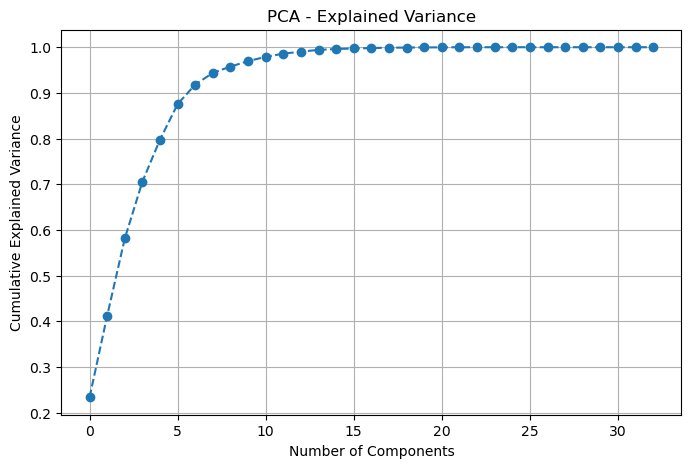

In [ ]:
imputer = SimpleImputer(strategy='mean')
data_filled = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filled)
pca.fit(scaled_data)

# Explained variance ratio (importance of each component)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative variance to decide number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()

# Get feature importance based on PCA loadings
feature_importance = pd.DataFrame(
    np.abs(pca.components_), columns=df_numerical.columns
).T
feature_importance.columns = [f'PC{i+1}' for i in range(len(df_numerical.columns))]
print("\nFeature Importance based on PCA:\n", feature_importance)

# Select important features (e.g., features with high loadings in first few PCs)
top_features = feature_importance.abs().sum(axis=1).sort_values(ascending=False)
print("\nSelected Features:\n", top_features.head(3))


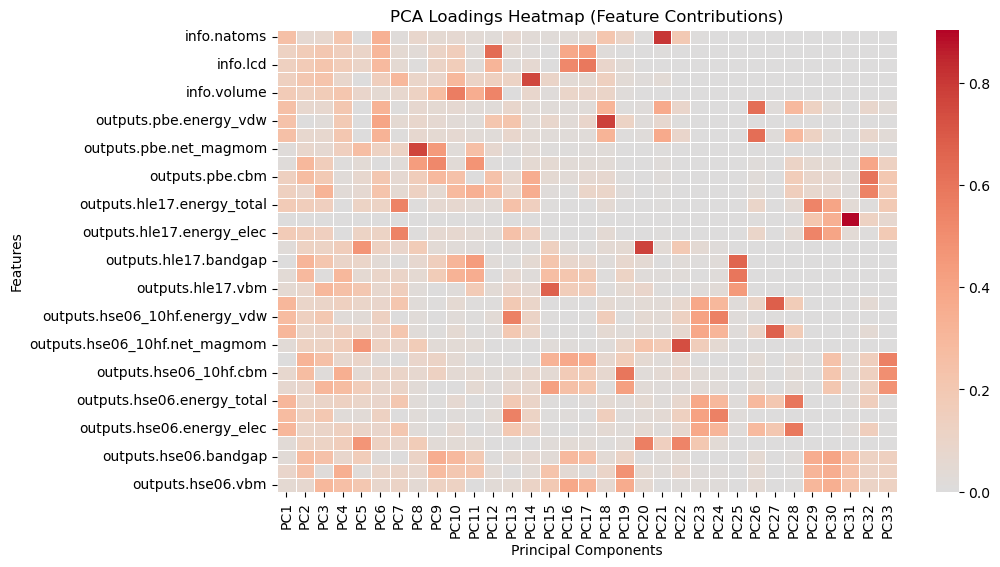

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('PCA Loadings Heatmap (Feature Contributions)')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()